In [1]:

## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [35]:
covid = pd.read_csv('covid.csv', encoding="utf-16", sep=',')

In [4]:
covid.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,Clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,672064,M,52.0,Años,Argentina,Buenos Aires,Florencio Varela,Buenos Aires,2020-05-29,NaN,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,274,2020-06-11
1,717629,F,46.0,Años,Argentina,Buenos Aires,Pergamino,Buenos Aires,2020-01-29,2020-01-31,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,NaN,623,2020-06-11
2,717926,F,41.0,Años,Argentina,CABA,COMUNA 12,CABA,2020-01-23,2020-01-31,...,NaN,NO,2,Público,Caso Invalidado Epidemiologicamente,Descartado,2,NaN,12,2020-06-11
3,718029,F,52.0,Años,Argentina,Buenos Aires,La Plata,Buenos Aires,2020-01-29,2020-01-31,...,NaN,NO,6,Público,Caso Invalidado Epidemiologicamente,Descartado,6,NaN,441,2020-06-11
4,718055,F,34.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-01-16,2020-01-31,...,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-02-11,0,2020-06-11


In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197405 entries, 0 to 197404
Data columns (total 25 columns):
id_evento_caso                      197405 non-null int64
sexo                                197405 non-null object
edad                                197076 non-null float64
edad_años_meses                     197405 non-null object
residencia_pais_nombre              197405 non-null object
residencia_provincia_nombre         197405 non-null object
residencia_departamento_nombre      197405 non-null object
carga_provincia_nombre              197405 non-null object
fecha_inicio_sintomas               130502 non-null object
fecha_apertura                      197404 non-null object
sepi_apertura                       197405 non-null int64
fecha_internacion                   52142 non-null object
cuidado_intensivo                   197405 non-null object
fecha_cui_intensivo                 7772 non-null object
fallecido                           197405 non-null object
fecha_fa

In [12]:
covid['fallecido'].value_counts()

NO    195108
SI      2297
Name: fallecido, dtype: int64

In [54]:
covid['clasificacion_resumen'].value_counts()

Descartado        155502
Confirmado         27360
Sospechoso         14539
Sin Clasificar         4
Name: clasificacion_resumen, dtype: int64

In [114]:
amba = covid[(covid['carga_provincia_nombre']=='CABA')|(covid['carga_provincia_nombre']=='Buenos Aires')]
amba['fecha_apertura'] = pd.to_datetime(amba['fecha_apertura'])
amba['mes'] = amba['fecha_apertura'].dt.month

In [123]:
junio = amba[amba['mes']==6]
positivos = junio.groupby(['fecha_apertura', 'carga_provincia_nombre', 'clasificacion_resumen'])[['sexo']].count().unstack()
positivos = positivos.reset_index().fillna(0)
positivos['total'] = positivos.sexo.Confirmado+positivos.sexo.Descartado+positivos.sexo['Sin Clasificar']+positivos.sexo.Sospechoso
positivos = positivos.sort_values('fecha_apertura')
positivos.head(30)

fecha_apertura carga_provincia_nombre       sexo  \
clasificacion_resumen                                       Confirmado   
0                         2020-06-01           Buenos Aires      356.0   
1                         2020-06-01                   CABA      427.0   
2                         2020-06-02           Buenos Aires      271.0   
3                         2020-06-02                   CABA      550.0   
4                         2020-06-03           Buenos Aires      358.0   
5                         2020-06-03                   CABA      444.0   
6                         2020-06-04           Buenos Aires      336.0   
7                         2020-06-04                   CABA      527.0   
8                         2020-06-05           Buenos Aires      389.0   
9                         2020-06-05                   CABA      561.0   
11                        2020-06-06                   CABA      480.0   
10                        2020-06-06           Buenos Aires      295.0   
12                        2020-06-07           Buenos Aires      282.0   
13                        2020-06-07                   CABA      443.0   
14                        2020-06-08           Buenos Aires      438.0   
15                        2020-06-08                   CABA      633.0   
16                        2020-06-09           Buenos Aires      385.0   
17                        2020-06-09                   CABA      617.0   
18                        2020-06-10           Buenos Aires      257.0   
19                        2020-06-10                   CABA      507.0   
20                        2020-06-11           Buenos Aires       70.0   
21                        2020-06-11                   CABA      100.0   

                                                             total  
clasificacion_resumen Descartado Sin Clasificar Sospechoso          
0                         1305.0            0.0       79.0  1740.0  
1                          931.0            0.0      106.0  1464.0  
2                         1305.0            0.0      115.0  1691.0  
3                         1238.0            0.0       64.0  1852.0  
4                         1385.0            0.0      127.0  1870.0  
5                         1119.0            0.0       55.0  1618.0  
6                         1392.0            0.0      179.0  1907.0  
7                         1173.0            0.0       71.0  1771.0  
8                         1401.0            0.0      168.0  1958.0  
9                         1096.0            0.0       86.0  1743.0  
11                         836.0            0.0      168.0  1484.0  
10                        1036.0            0.0      151.0  1482.0  
12                         683.0            0.0      135.0  1100.0  
13                         752.0            0.0      111.0  1306.0  
14                        1362.0            0.0      361.0  2161.0  
15                        1048.0            1.0      223.0  1905.0  
16                        1015.0            0.0      653.0  2053.0  
17                        1039.0            0.0      471.0  2127.0  
18                         651.0            0.0     1415.0  2323.0  
19                         842.0            0.0      937.0  2286.0  
20                          64.0            0.0     1618.0  1752.0  
21                         273.0            0.0     1404.0  1777.0

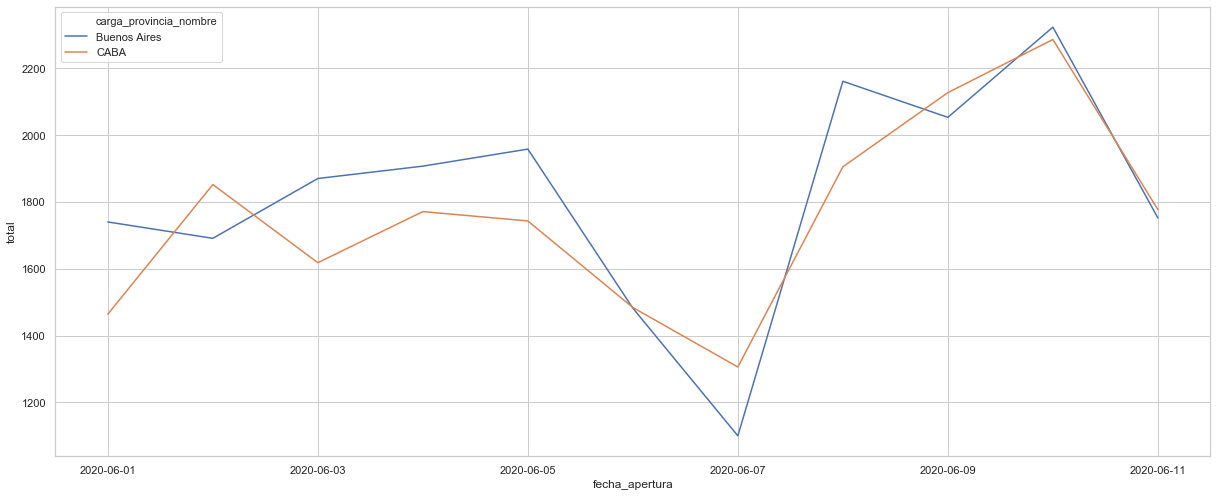

In [124]:
plt.figure(figsize=(20.7, 8.27))
ax = sns.lineplot(x="fecha_apertura", y="total", data=positivos, hue='carga_provincia_nombre')